In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)

In [23]:
caminho = "arquivos/enriquecidos/baseDeDados.xlsx"
db = pd.read_excel(caminho)
db = db[(db['ds_cargo'] == 'Presidente') | (db['ds_cargo'] == 'Governador')]
db = db[(db['pc_votos_validos100'] != 0.00)]
db = db.replace('-', np.nan)
listaPesquisas = db['pesquisa'].groupby(db['pesquisa']).first().values.tolist()
def imagemCorrelacao(correlacao, caminho_arquivo = None, nome = None):
    fig, ax = plt.subplots(figsize=(14, 12))
    # Mapa de cores divergente vermelho ↔ azul
    im = ax.imshow(
        correlacao,
        cmap='coolwarm',
        vmin=-1,
        vmax=1
    )
    
    # Barra de cores
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label(f'Correlação de Pearson {nome}', rotation=270, labelpad=15)
    
    # Eixos
    ax.set_xticks(np.arange(len(correlacao.columns)))
    ax.set_yticks(np.arange(len(correlacao.columns)))
    
    ax.set_xticklabels(correlacao.columns, rotation=90)
    ax.set_yticklabels(correlacao.columns)
    
    # Colocar valores nas células
    for i in range(len(correlacao.columns)):
        for j in range(len(correlacao.columns)):
            value = correlacao.iloc[i, j]
            ax.text(
                j, i,
                f"{value:.2f}",
                ha="center",
                va="center",
                fontsize=8,
                color="black" if abs(value) < 0.6 else "white"
            )
    
    ax.set_title(f'Correlação de Pearson {nome}', fontsize=16, pad=20)
    
    plt.tight_layout()
    if caminho_arquivo == None:
        plt.show()
    else:
        plt.savefig(
            caminho_arquivo+'/'+nome+'.png',
            dpi=300,
            bbox_inches='tight'
        )
        plt.close()

C:\Users\krist\AppData\Local\Temp\ipykernel_36584\1335140337.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  db = db.replace('-', np.nan)


In [10]:
def todos(db):
    col_texto_cat = ['ds_cargo', 'sg_uf', 'metodologia', 'pesquisa', 'sg_partido', ]
    col_numericas = ['nr_turno', 'amostra', 'Margem de erro', 'Erro pesquisa', 'percentualPesquisa', 'aa_eleicao', 'nr_candidato', 'DistanciaDataPesquisaEleicao', 'diferencaPesquisaEleicao', 'Acertou']
    df = db[col_texto_cat + col_numericas].copy()
    # Numéricas
    for col in col_numericas:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    encoders = {}
    for col in col_texto_cat:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le  # se quiser reverter depois
    correlacao = df.corr(method='pearson')
    return correlacao

In [24]:
db

,Unnamed: 0,idPesquisa,ds_cargo,sg_uf,nr_turno,dataPesquisa,amostra,metodologia,Margem de erro,Erro pesquisa,9,nm_urna_candidato,percentualPesquisa,aa_eleicao,pesquisa,cd_cargo,nr_candidato,nm_candidato,sg_partido,ds_composicao_coligacao,ds_sit_totalizacao,dt_ult_totalizacao,sg_ue,sq_candidato,nm_tipo_destinacao_votos,sq_eleicao_divulga,pc_votos_validos,qt_votos_nom_validos,qt_votos_concorrentes,nm_municipio,pc_votos_validos100,ranking,Acertou,tipo,data1,data2,data_eleicao,DistanciaDataPesquisaEleicao,diferencaPesquisaEleicao
0,0,0,Presidente,BR,1,2022-08-06,1.0,Fone,3.1,12.2,NaN,JAIR BOLSONARO,37.5,2022,6 Sigma,1.0,22.0,JAIR MESSIAS BOLSONARO,PL,PP / REPUBLICANOS / PL,Segundo turno,2022-10-04 12:06:36,BR,2.800016e+11,Válido,2.040602e+09,0.4320,51072345.0,118229719.0,Brasil,43.20,1,True,2,2022-10-02,2022-10-30,2022-10-02,57,-5.70
1,1,0,Presidente,BR,1,2022-08-06,1.0,Fone,3.1,12.2,NaN,LULA,28.2,2022,6 Sigma,1.0,13.0,LUIZ INÁCIO LULA DA SILVA,PT,Federação Brasil da Esperança - FE BRASIL(PT/P...,Segundo turno,2022-10-04 12:06:36,BR,2.800016e+11,Válido,2.040602e+09,0.4843,57259504.0,118229719.0,Brasil,48.43,2,True,2,2022-10-02,2022-10-30,2022-10-02,57,-20.23
2,2,0,Presidente,BR,1,2022-08-06,1.0,Fone,3.1,12.2,NaN,CIRO GOMES,8.0,2022,6 Sigma,1.0,12.0,CIRO FERREIRA GOMES,PDT,PDT,Não Eleito,2022-10-04 12:06:36,BR,2.800016e+11,Válido,2.040602e+09,0.0304,3599287.0,118229719.0,Brasil,3.04,3,False,2,2022-10-02,2022-10-30,2022-10-02,57,4.96
3,3,0,Presidente,BR,1,2022-08-06,1.0,Fone,3.1,12.2,NaN,SIMONE TEBET,3.0,2022,6 Sigma,1.0,15.0,SIMONE NASSAR TEBET,MDB,MDB / Federação PSDB Cidadania(PSDB/CIDADANIA)...,Não Eleito,2022-10-04 12:06:36,BR,2.800016e+11,Válido,2.040602e+09,0.0416,4915423.0,118229719.0,Brasil,4.16,4,False,2,2022-10-02,2022-10-30,2022-10-02,57,-1.16
5,5,0,Presidente,BR,1,2022-08-06,1.0,Fone,3.1,12.2,NaN,SOFIA MANZANO,0.0,2022,6 Sigma,1.0,21.0,SOFIA PADUA MANZANO,PCB,PCB,Não Eleito,2022-10-04 12:06:36,BR,2.800016e+11,Válido,2.040602e+09,0.0004,45620.0,118229719.0,Brasil,0.04,6,False,2,2022-10-02,2022-10-30,2022-10-02,57,-0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19183,19183,427,Governador,BA,1,2018-08-18,1.2,Fone,3.0,3.5,NaN,JOÃO HENRIQUE DURVAL CARNEIRO,1.0,2018,REAL TIME,3.0,28.0,JOÃO HENRIQUE DE BARRADAS CARNEIRO,PRTB,PRTB / PSL,Não Eleito,2020-11-06 14:05:14,BA,5.000062e+10,Válido,2.022802e+09,0.0058,38960.0,6749554.0,Capital do estado,0.58,3,False,2,2018-10-07,2018-10-28,2018-10-07,50,0.42
19184,19184,427,Governador,BA,1,2018-08-18,1.2,Fone,3.0,3.5,NaN,MARCOS MENDES,0.0,2018,REAL TIME,3.0,50.0,MARCOS ANTONIO GUIMARAES MENDES,PSOL,PSOL,Não Eleito,2020-11-06 14:05:14,BA,5.000060e+10,Válido,2.022802e+09,0.0066,44702.0,6737327.0,Capital do estado,0.66,4,False,2,2018-10-07,2018-10-28,2018-10-07,50,-0.66
19185,19185,427,Governador,BA,1,2018-08-18,1.2,Fone,3.0,3.5,NaN,ORLANDO ANDRADE,0.0,2018,REAL TIME,3.0,29.0,ORLANDO ANDRADE DE JESUS,PCO,PCO,Não Eleito,2020-11-06 14:05:14,BA,5.000062e+10,Válido,2.022802e+09,0.0005,3100.0,6150664.0,Capital do estado,0.05,5,False,2,2018-10-07,2018-10-28,2018-10-07,50,-0.05
19186,19186,427,Governador,BA,1,2018-08-18,1.2,Fone,3.0,3.5,NaN,CÉLIA SACRAMENTO,0.0,2018,REAL TIME,3.0,18.0,CÉLIA OLIVEIRA DE JESUS SACRAMENTO,REDE,REDE,Não Eleito,2020-11-06 14:05:14,BA,5.000062e+10,Válido,2.022802e+09,0.0046,31198.0,6749554.0,Capital do estado,0.46,6,False,2,2018-10-07,2018-10-28,2018-10-07,50,-0.46


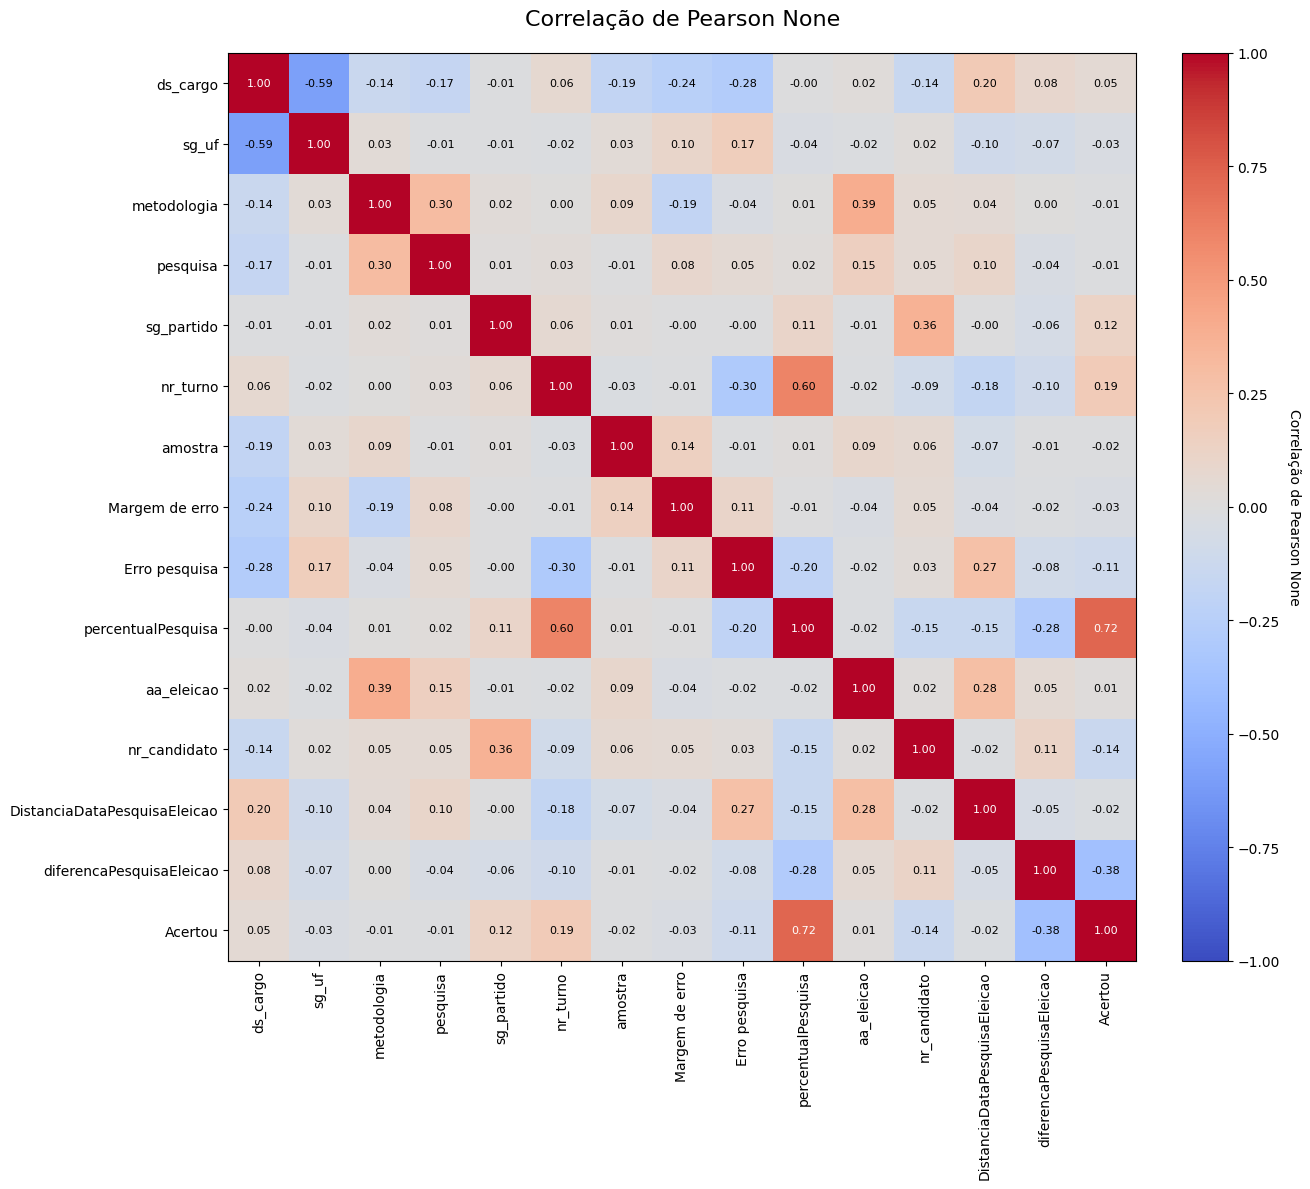

In [25]:
imagemCorrelacao(todos(db))

In [26]:
for pesquisa in listaPesquisas:
    imagemCorrelacao(todos(db[db['pesquisa'] == pesquisa]),'arquivos/imagens/pesquisa',pesquisa)

In [15]:
#db.groupby(['pesquisa','metodologia']).nunique().reset_index()#['pesquisa','metodologia','idPesquisa','']
resultado = (
    db
    .groupby(['pesquisa','metodologia'])
    .agg(
        QuantidadePesquisas=('idPesquisa', 'nunique')
    )
).reset_index()
tmp = (
    db[db['Acertou'] == True]
    .groupby(['pesquisa','metodologia'])
    .agg(
        quantidadeAcertos=('Acertou', 'sum')
    )
).reset_index()
tmp2 = (
    db[(db['Acertou'] == True) & (db['ds_sit_totalizacao'] == 'Eleito')]
    .groupby(['pesquisa','metodologia'])
    .agg(
        quantidadeAcertosExatos=('Acertou', 'sum'),
        mediaErro=('diferencaPesquisaEleicao', 'mean')
    )
).reset_index()
estratificado = pd.merge(pd.merge(resultado,tmp),tmp2)
estratificado['percentual'] = ((estratificado['quantidadeAcertosExatos']/estratificado['QuantidadePesquisas'])*100)
estratificado.to_excel('arquivos/enriquecidos/estratificado.xlsx')

In [17]:
db

,Unnamed: 0,idPesquisa,ds_cargo,sg_uf,nr_turno,dataPesquisa,amostra,metodologia,Margem de erro,Erro pesquisa,9,nm_urna_candidato,percentualPesquisa,aa_eleicao,pesquisa,cd_cargo,nr_candidato,nm_candidato,sg_partido,ds_composicao_coligacao,ds_sit_totalizacao,dt_ult_totalizacao,sg_ue,sq_candidato,nm_tipo_destinacao_votos,sq_eleicao_divulga,pc_votos_validos,qt_votos_nom_validos,qt_votos_concorrentes,nm_municipio,pc_votos_validos100,ranking,Acertou,tipo,data1,data2,data_eleicao,DistanciaDataPesquisaEleicao,diferencaPesquisaEleicao
0,0,0,Presidente,BR,1,2022-08-06,1.0,Fone,3.1,12.2,NaN,JAIR BOLSONARO,37.5,2022,6 Sigma,1.0,22.0,JAIR MESSIAS BOLSONARO,PL,PP / REPUBLICANOS / PL,Segundo turno,2022-10-04 12:06:36,BR,2.800016e+11,Válido,2.040602e+09,0.4320,51072345.0,118229719.0,Brasil,43.20,1,True,2,2022-10-02,2022-10-30,2022-10-02,57,-5.70
1,1,0,Presidente,BR,1,2022-08-06,1.0,Fone,3.1,12.2,NaN,LULA,28.2,2022,6 Sigma,1.0,13.0,LUIZ INÁCIO LULA DA SILVA,PT,Federação Brasil da Esperança - FE BRASIL(PT/P...,Segundo turno,2022-10-04 12:06:36,BR,2.800016e+11,Válido,2.040602e+09,0.4843,57259504.0,118229719.0,Brasil,48.43,2,True,2,2022-10-02,2022-10-30,2022-10-02,57,-20.23
2,2,0,Presidente,BR,1,2022-08-06,1.0,Fone,3.1,12.2,NaN,CIRO GOMES,8.0,2022,6 Sigma,1.0,12.0,CIRO FERREIRA GOMES,PDT,PDT,Não Eleito,2022-10-04 12:06:36,BR,2.800016e+11,Válido,2.040602e+09,0.0304,3599287.0,118229719.0,Brasil,3.04,3,False,2,2022-10-02,2022-10-30,2022-10-02,57,4.96
3,3,0,Presidente,BR,1,2022-08-06,1.0,Fone,3.1,12.2,NaN,SIMONE TEBET,3.0,2022,6 Sigma,1.0,15.0,SIMONE NASSAR TEBET,MDB,MDB / Federação PSDB Cidadania(PSDB/CIDADANIA)...,Não Eleito,2022-10-04 12:06:36,BR,2.800016e+11,Válido,2.040602e+09,0.0416,4915423.0,118229719.0,Brasil,4.16,4,False,2,2022-10-02,2022-10-30,2022-10-02,57,-1.16
4,4,0,Presidente,BR,1,2022-08-06,1.0,Fone,3.1,12.2,NaN,PABLO MARCAL,1.1,2022,6 Sigma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,5,False,2,2022-10-02,2022-10-30,2022-10-02,57,1.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19183,19183,427,Governador,BA,1,2018-08-18,1.2,Fone,3.0,3.5,NaN,JOÃO HENRIQUE DURVAL CARNEIRO,1.0,2018,REAL TIME,3.0,28.0,JOÃO HENRIQUE DE BARRADAS CARNEIRO,PRTB,PRTB / PSL,Não Eleito,2020-11-06 14:05:14,BA,5.000062e+10,Válido,2.022802e+09,0.0058,38960.0,6749554.0,Capital do estado,0.58,3,False,2,2018-10-07,2018-10-28,2018-10-07,50,0.42
19184,19184,427,Governador,BA,1,2018-08-18,1.2,Fone,3.0,3.5,NaN,MARCOS MENDES,0.0,2018,REAL TIME,3.0,50.0,MARCOS ANTONIO GUIMARAES MENDES,PSOL,PSOL,Não Eleito,2020-11-06 14:05:14,BA,5.000060e+10,Válido,2.022802e+09,0.0066,44702.0,6737327.0,Capital do estado,0.66,4,False,2,2018-10-07,2018-10-28,2018-10-07,50,-0.66
19185,19185,427,Governador,BA,1,2018-08-18,1.2,Fone,3.0,3.5,NaN,ORLANDO ANDRADE,0.0,2018,REAL TIME,3.0,29.0,ORLANDO ANDRADE DE JESUS,PCO,PCO,Não Eleito,2020-11-06 14:05:14,BA,5.000062e+10,Válido,2.022802e+09,0.0005,3100.0,6150664.0,Capital do estado,0.05,5,False,2,2018-10-07,2018-10-28,2018-10-07,50,-0.05
19186,19186,427,Governador,BA,1,2018-08-18,1.2,Fone,3.0,3.5,NaN,CÉLIA SACRAMENTO,0.0,2018,REAL TIME,3.0,18.0,CÉLIA OLIVEIRA DE JESUS SACRAMENTO,REDE,REDE,Não Eleito,2020-11-06 14:05:14,BA,5.000062e+10,Válido,2.022802e+09,0.0046,31198.0,6749554.0,Capital do estado,0.46,6,False,2,2018-10-07,2018-10-28,2018-10-07,50,-0.46


In [16]:
estratificado

,pesquisa,metodologia,QuantidadePesquisas,quantidadeAcertos,quantidadeAcertosExatos,mediaErro,percentual
0,AtlasIntel,Web,67,87,35,-6.108286,52.238806
1,Brasmarket,Fone,16,15,4,-9.780000,25.000000
2,Brasmarket,Presencial,2,2,2,-16.160000,100.000000
3,DataPoder360,Fone,34,56,9,-0.814444,26.470588
4,Datafolha,Fluxo,160,189,80,-10.951375,50.000000
5,Datafolha,Presencial,14,14,4,-4.640000,28.571429
6,Datavox (PB),Presencial,4,7,1,-31.680000,25.000000
7,Estimativa,Presencial,4,4,2,-18.750000,50.000000
8,FSB Pesquisa,Fone,27,44,7,0.495714,25.925926
9,FSB Pesquisa,Presencial,2,2,1,-6.790000,50.000000
